In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer



In [5]:
# Scaling age to a range

# read data
data = pd.read_csv('Churn_Modelling.csv')

# List of all the variables i want to change
VariableList = ['Age']
# new name for the scaled info
normVariableName = ['AgeScaled']

# import Scaler
scaler = MinMaxScaler()

# dont really need a for loop, since were scaling just 1 field
for i in range(0,len(data)):
    for j in range(0,len(VariableList)):
        temp = data[VariableList[j]]
        temp1 = temp.values.reshape(-1,1)
        scaler.fit(temp1)
        norm = scaler.transform(temp1)
        data.at[i, normVariableName[j]] = norm[i]




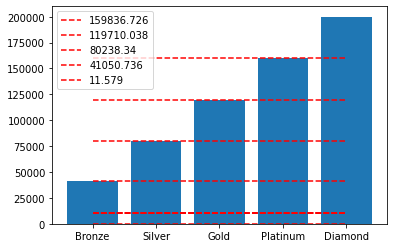

In [37]:
fig, ax = plt.subplots()
sortedData = data.sort_values(by='EstimatedSalary')

bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
sortedData['quantileSalary'] = pd.qcut(sortedData['EstimatedSalary'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
boundaries = pd.qcut(sortedData['EstimatedSalary'],
                              q=[0, .2, .4, .6, .8, 1]).unique()

quantiles = sorted(boundaries, key = lambda x : x.left, reverse = True)

x = sortedData['quantileSalary']
y = sortedData['EstimatedSalary']
ax.bar(x, y)

for i in quantiles:
    ax.hlines([i.left, 10000], 0, 4, linestyles='dashed', colors='red', label=str(i.left))

plt.legend()

In [26]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# pd.DataFrame(encoder.fit_transform(list(data['Geography']))
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Geography']]).toarray())
# encoder_df = pd.DataFrame(encoder.fit_transform)
#perform one-hot encoding on 'team' column
encoder_df.columns = encoder.categories_
#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)

#view final df
final_df



[array(['France', 'Germany', 'Spain'], dtype=object)]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeScaled,"(France,)","(Germany,)","(Spain,)"
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.324324,1.0,0.0,0.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.310811,0.0,0.0,1.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.324324,1.0,0.0,0.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.283784,1.0,0.0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.337838,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.283784,1.0,0.0,0.0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.229730,1.0,0.0,0.0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.243243,1.0,0.0,0.0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.324324,0.0,1.0,0.0
